## Importing the required libraries

In [44]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [45]:
from keras import regularizers

In [46]:
import os

In [47]:
mylist= os.listdir('C:\\Users\\anupa\\Desktop\\Speech Emotion\\Speech-Emotion-Analyzer\\IEMOCAP\\')

In [48]:
type(mylist)
# mylist

list

In [49]:
print(mylist[10])

Ses01F_impro01_F010.wav


In [50]:
print(mylist[10][6:-16])

_


## Plotting the audio file's waveform and its spectrogram

In [51]:
data, sampling_rate = librosa.load('C:\\Users\\anupa\\Desktop\\Speech Emotion\\Speech-Emotion-Analyzer\\IEMOCAP\\Ses01F_impro01_F000.wav')

Populating the interactive namespace from numpy and matplotlib


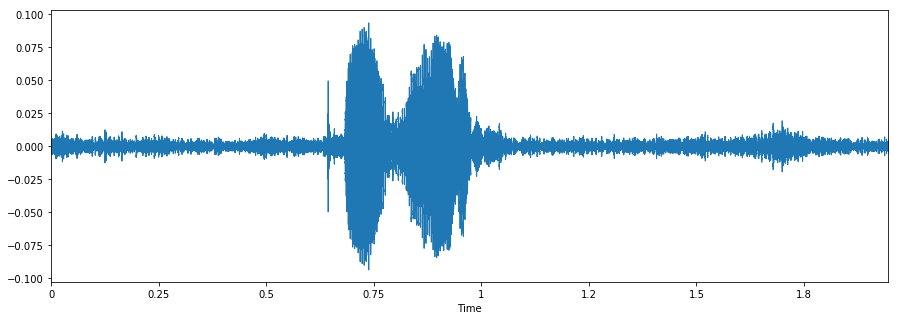

In [52]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

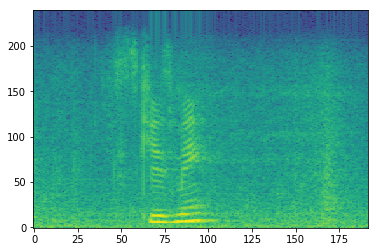

In [53]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('C:\\Users\\anupa\\Desktop\\Speech Emotion\\Speech-Emotion-Analyzer\\IEMOCAP\\Ses01F_impro01_F000.wav')
## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [54]:
mylist = pd.DataFrame({'Name':mylist})

In [55]:
# sam=mylist[0]
# sam[-8] #gender
# sam[]

df = pd.read_csv('emotion_values.csv')
df = df.reset_index()
df.drop('index', inplace=True, axis=1)
print(df.shape, mylist.shape)

df['Name']=df['Name'].astype(str)+ '.wav'
print(df.head())

(10036, 2) (1009, 1)
                      Name Label
0  Ses01F_impro03_F000.wav   hap
1  Ses01F_impro03_F001.wav   hap
2  Ses01F_impro03_F002.wav   hap
3  Ses01F_impro03_F003.wav   xxx
4  Ses01F_impro03_F004.wav   hap


In [56]:
len(df)

10036

In [57]:
emodf = mylist.merge(df, on='Name', how='inner')
# print(emodf.head())
# len(emodf)
# print(emodf)

emodf = emodf[emodf['Label'] !='xxx']
emodf = emodf[emodf['Label'] !='fru']
emodf = emodf[emodf['Label'] !='exc']
emodf = emodf[emodf['Label'] !='sur']
emodf = emodf[emodf['Label'] !='oth']
emodf = emodf[emodf['Label'] !='dis']

emodf = emodf.reset_index()
del emodf['index']
emodf[200:500]

,Name,Label
200,Ses01F_impro06_M006.wav,neu
201,Ses01F_impro06_M007.wav,sad
202,Ses01F_impro06_M008.wav,neu
203,Ses01F_impro06_M009.wav,neu
204,Ses01F_impro06_M010.wav,neu
205,Ses01F_impro06_M011.wav,neu
206,Ses01F_impro06_M012.wav,neu
207,Ses01F_impro06_M013.wav,neu
208,Ses01F_impro06_M014.wav,neu
209,Ses01F_impro06_M015.wav,neu


In [58]:
feeling_list=[]
for i in range (len(emodf)):
    if emodf['Name'][i][-8]=='F' and emodf['Label'][i] == 'hap':
        feeling_list.append('female_happy')
    elif emodf['Name'][i][-8]=='M' and emodf['Label'][i] == 'hap':
        feeling_list.append('male_happy')
    elif emodf['Name'][i][-8]=='F' and emodf['Label'][i] == 'sad':
        feeling_list.append('female_sad')
    elif emodf['Name'][i][-8]=='M' and emodf['Label'][i] == 'sad':
        feeling_list.append('male_sad')
    elif emodf['Name'][i][-8]=='F' and emodf['Label'][i] == 'ang':
        feeling_list.append('female_angry')
    elif emodf['Name'][i][-8]=='M' and emodf['Label'][i] == 'ang':
        feeling_list.append('male_angry')
    elif emodf['Name'][i][-8]=='F' and emodf['Label'][i] == 'fea':
        feeling_list.append('female_fearful')
    elif emodf['Name'][i][-8]=='M' and emodf['Label'][i] == 'fea':
        feeling_list.append('male_fearful')
    elif emodf['Name'][i][-8]=='F' and emodf['Label'][i] == 'neu':
        feeling_list.append('female_calm')
    elif emodf['Name'][i][-8]=='M' and emodf['Label'][i] == 'neu':
        feeling_list.append('male_calm')
    else:
        print('********************ERROR!!*********************\n')
        print(emodf.loc[[i]] )  
        print('********************ERROR!!*********************\n')
len(feeling_list)


525

In [59]:
labels = pd.DataFrame(feeling_list)

In [60]:
#emodf
labels[:500]

,0
0,female_calm
1,female_calm
2,female_calm
3,female_calm
4,female_angry
5,female_calm
6,male_angry
7,male_angry
8,female_sad
9,female_sad


## Getting the features of audio files using librosa

In [61]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(emodf.Name):
        X, sample_rate = librosa.load('C:\\Users\\anupa\\Desktop\\Speech Emotion\\Speech-Emotion-Analyzer\\IEMOCAP\\'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [62]:
df.head()

,feature
0,"[-24.814797695341987, -22.876260341293417, -23..."
1,"[-25.76858442380448, -25.34013885432735, -24.6..."
2,"[-29.956973411676735, -25.491193950871857, -22..."
3,"[-24.500004820258805, -24.3128761505823, -24.5..."
4,"[-1.6330392398890317, -5.724938189203704, -11...."


In [63]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [64]:
newdf = pd.concat([df3,labels], axis=1)

In [65]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [66]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-24.814798,-22.876260,-23.521118,-24.329039,-23.046928,-22.318902,-22.556181,-24.039121,-27.488352,-24.745085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_calm
1,-25.768584,-25.340139,-24.608174,-26.293708,-27.696113,-22.598145,-19.750524,-18.976982,-20.704252,-20.099096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_calm
2,-29.956973,-25.491194,-22.223434,-22.361417,-22.264210,-21.692891,-22.643560,-25.013773,-23.074876,-22.169737,...,-24.160212,-25.235685,-26.233232,-25.120223,-23.682727,-22.013748,-25.257524,-26.155776,-25.168728,female_calm
3,-24.500005,-24.312876,-24.521409,-24.884996,-24.905356,-22.557921,-24.456338,-23.255932,-22.785274,-20.380119,...,-14.826652,-15.444098,-15.365163,-14.910847,-13.817494,-15.382468,-14.711274,-8.333384,-2.649197,female_calm
4,-1.633039,-5.724938,-11.767223,-12.654226,-14.455803,-15.141911,-14.394723,-14.274874,-13.774394,-14.371284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry


In [67]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
435,-20.261653,-21.180011,-21.113446,-20.115834,-22.004468,-23.814422,-23.061905,-16.833153,-12.529240,-14.865694,...,-14.027372,-14.444166,-14.423925,-15.538242,-15.398838,-16.867562,-18.878382,-14.339018,-9.106949,male_angry
8,-28.256574,-27.123500,-24.306599,-23.205272,-25.880059,-24.782155,-24.395320,-24.110257,-24.120008,-23.916054,...,-26.664007,-22.293413,-22.102692,-22.967214,-22.457875,-23.945642,-25.215938,-24.602589,-24.958926,female_sad
85,-26.742203,-22.371158,-19.891536,-22.273867,-21.207505,-18.964215,-20.584454,-20.556126,-20.443817,-22.619377,...,-16.330392,-17.318563,-16.542837,-17.530624,-19.729600,-21.174064,-22.329470,-21.169306,-19.981457,male_calm
224,-26.299451,-26.390770,-24.879003,-23.726950,-23.256596,-22.739686,-22.398643,-22.938265,-21.842797,-21.684423,...,-24.614129,-23.035770,-23.211171,-22.758761,-21.076325,-21.912569,-22.666278,-23.719851,-24.555896,male_calm
404,-1.700958,-6.348321,-18.348569,-19.364719,-19.716489,-21.430985,-20.241398,-20.651260,-17.394739,-15.407942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_calm
317,-23.918318,-23.610545,-22.936240,-24.030717,-23.100356,-24.206663,-24.603369,-25.670316,-25.618183,-24.157952,...,-23.211464,-23.615469,-26.330949,-25.062123,-25.780217,-26.331461,-24.636620,-20.840240,-19.877623,female_sad
252,-23.273080,-20.509456,-19.765931,-17.879746,-16.062308,-14.176877,-12.850992,-11.894052,-12.326692,-13.845122,...,-8.275259,-11.946211,-14.285861,-12.646591,-10.769140,-7.913288,-8.040491,-3.252454,2.792018,female_angry
106,-27.140179,-25.147170,-20.730884,-18.993251,-19.220346,-17.702410,-17.064234,-17.811484,-17.030931,-15.817880,...,-21.868528,-23.232154,-24.219506,-23.338603,-21.242170,-20.494604,-20.195586,-20.732182,-21.895150,male_calm
497,-27.511488,-25.728554,-24.282276,-22.748884,-20.320245,-18.937731,-18.675754,-17.684669,-19.748140,-20.598312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_calm
147,-9.483778,-11.671387,-14.453416,-14.043049,-13.154705,-13.098379,-12.137928,-11.613776,-13.369702,-16.115262,...,-16.860443,-15.750663,-15.306232,-14.130336,-14.368287,-14.514889,-13.786424,-15.366100,-19.499521,male_calm


In [68]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [69]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [70]:
train[10:20]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
507,-17.238774,-16.708366,-18.520825,-16.865495,-15.133396,-15.386754,-17.392540,-16.842292,-14.957902,-13.109584,...,-12.240112,-12.105379,-13.247929,-13.443388,-11.572097,-10.589056,-11.868325,-9.531691,-5.344160,female_calm
443,-5.776522,-5.584935,-6.285755,-7.445161,-10.725319,-9.546195,-10.786515,-10.793889,-10.756617,-11.869603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
290,-26.946614,-25.621374,-25.885212,-24.717241,-23.238086,-21.886169,-22.256689,-21.228424,-21.351976,-22.495329,...,-10.710029,-6.469725,-5.674878,-7.118593,-7.065471,-8.621297,-11.516056,-12.368568,-13.670644,male_happy
37,-2.868125,-6.004559,-12.005296,-11.564483,-11.911267,-13.562382,-12.816323,-13.524584,-11.712020,-11.362743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_happy
31,-25.643277,-24.444464,-24.983727,-22.602346,-20.203196,-21.238232,-22.988447,-23.639684,-23.288039,-23.284352,...,-18.249214,-19.583855,-22.001075,-22.147478,-17.228651,-15.049518,-14.972938,-14.935728,-10.393694,male_calm
439,-13.724495,-11.797140,-11.736045,-13.143059,-14.464748,-13.678253,-12.999420,-11.639749,-12.347758,-13.251985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_angry
185,-26.321774,-23.565614,-22.460241,-26.092312,-26.820523,-24.275711,-24.131859,-25.361695,-25.937345,-25.172368,...,-25.461685,-22.642253,-22.752676,-20.532714,-18.633196,-19.048422,-18.116209,-13.332234,-9.427188,female_sad
242,-26.719190,-22.934626,-22.900987,-23.301387,-22.797424,-22.734247,-23.005707,-22.448860,-23.003799,-22.639429,...,-23.267657,-23.531584,-23.092036,-23.361199,-22.449160,-23.717626,-22.830296,-22.056180,-21.276499,female_angry
65,-4.290474,-5.235556,-4.694496,-5.721343,-9.858447,-12.640308,-12.463881,-13.438195,-13.171206,-12.639294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_happy
199,-13.188507,-12.316902,-12.301827,-10.538039,-10.238066,-11.854286,-14.841933,-13.627854,-12.413278,-13.659541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_calm


In [71]:
trainfeatures = train.iloc[:, :-1]

In [72]:
trainlabel = train.iloc[:, -1:]

In [73]:
testfeatures = test.iloc[:, :-1]

In [74]:
testlabel = test.iloc[:, -1:]

In [76]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
X_train.shape

(420, 216)

## Changing dimension for CNN model

In [79]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [80]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_6 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_7 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 27, 128)           82048     
__________

In [82]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [83]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=5, epochs=70, validation_data=(x_testcnn, y_test))

Train on 420 samples, validate on 105 samples
Epoch 1/70
420/420 [==============================] - 19s 46ms/step - loss: 2.1552 - acc: 0.2786 - val_loss: 2.1260 - val_acc: 0.2286
Epoch 2/70
420/420 [==============================] - 0s 1ms/step - loss: 2.0185 - acc: 0.2905 - val_loss: 2.0921 - val_acc: 0.2381
Epoch 3/70
420/420 [==============================] - 0s 1ms/step - loss: 1.9843 - acc: 0.2905 - val_loss: 2.0763 - val_acc: 0.2190
Epoch 4/70
420/420 [==============================] - 0s 1ms/step - loss: 1.9671 - acc: 0.3000 - val_loss: 2.0754 - val_acc: 0.2095
Epoch 5/70
420/420 [==============================] - 0s 1ms/step - loss: 1.9587 - acc: 0.3000 - val_loss: 2.0635 - val_acc: 0.2190
Epoch 6/70
420/420 [==============================] - 0s 1ms/step - loss: 1.9510 - acc: 0.2952 - val_loss: 2.0663 - val_acc: 0.2286
Epoch 7/70
420/420 [==============================] - 0s 1ms/step - loss: 1.9446 - acc: 0.3024 - val_loss: 2.0600 - val_acc: 0.2286
Epoch 8/70
420/420 [========

420/420 [==============================] - 0s 1ms/step - loss: 1.5969 - acc: 0.4238 - val_loss: 1.9340 - val_acc: 0.2762
Epoch 63/70
420/420 [==============================] - 0s 1ms/step - loss: 1.5861 - acc: 0.4167 - val_loss: 1.9159 - val_acc: 0.2952
Epoch 64/70
420/420 [==============================] - 0s 1ms/step - loss: 1.5823 - acc: 0.4310 - val_loss: 1.9675 - val_acc: 0.2762
Epoch 65/70
420/420 [==============================] - 1s 1ms/step - loss: 1.5719 - acc: 0.4238 - val_loss: 1.9956 - val_acc: 0.2286
Epoch 66/70
420/420 [==============================] - 0s 1ms/step - loss: 1.5736 - acc: 0.4238 - val_loss: 1.9548 - val_acc: 0.2762
Epoch 67/70
420/420 [==============================] - 0s 1ms/step - loss: 1.5635 - acc: 0.4381 - val_loss: 1.9223 - val_acc: 0.2571
Epoch 68/70
420/420 [==============================] - 1s 1ms/step - loss: 1.5563 - acc: 0.4310 - val_loss: 1.9228 - val_acc: 0.2762
Epoch 69/70
420/420 [==============================] - 0s 1ms/step - loss: 1.5507

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

## Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

In [ ]:
preds

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[170:180]

In [ ]:
finaldf.groupby('actualvalues').count()

In [ ]:
finaldf.groupby('predictedvalues').count()

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [ ]:
data, sampling_rate = librosa.load('output10.wav')

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

In [ ]:
livepreds

In [ ]:
livepreds1=livepreds.argmax(axis=1)

In [ ]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions